# K-Means Clustering: Customer Segmentation

### Load Dataset  
We use customer data with columns like **"Annual Income"** and **"Spending Score"**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df=pd.read_csv(r"D:\My folder\ostad\module_14\K_means_clustering\Mall_Customers.csv")
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Feature Selection  
We extract only **Annual Income** and **Spending Score** for clustering.

### Data Scaling  
Since **K-Means is distance-based**, we **standardize** the features to ensure fair comparisons.

In [2]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Finding Optimal Clusters  
We use the **Elbow Method** to determine the best number of clusters by plotting **Within-Cluster Sum of Squares (WCSS)**.

C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

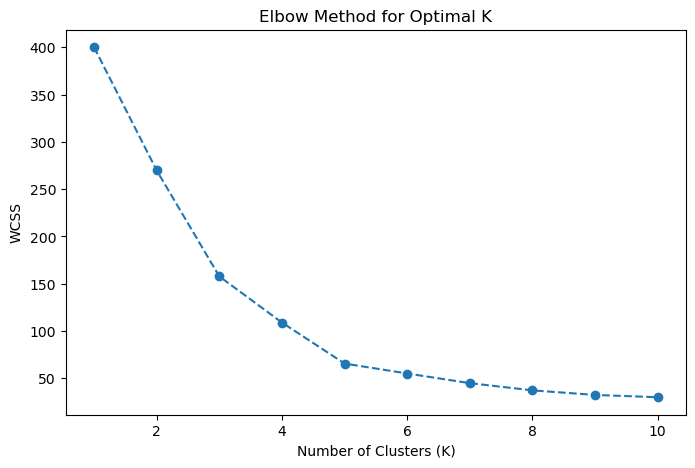

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


### K-Means Clustering  
We apply **K-Means with `n_clusters=5`** and assign each customer to a segment.

### Visualization  
We plot the **clusters** in different colors and mark the **centroids** with red 'X' markers.

C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


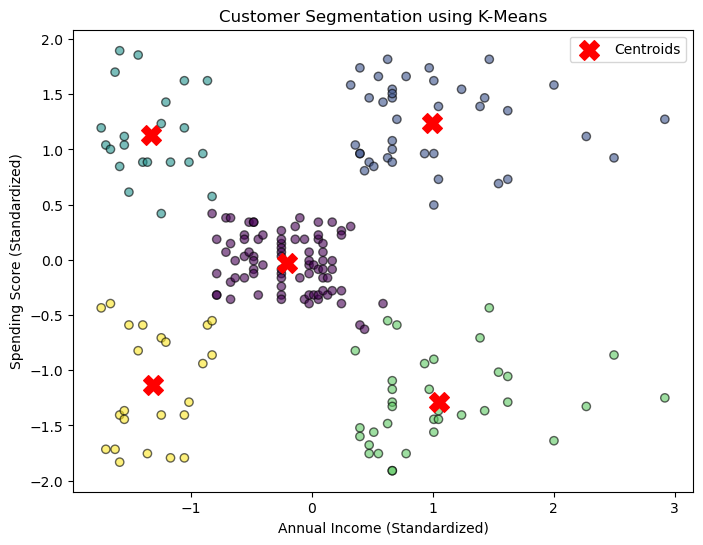

In [4]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()

## 📊 Business Insights from Clusters

- **🟢 High-income, high-spending customers** → 🏆 **VIPs (Loyal Customers)**  
  *These customers spend a lot and have high purchasing power. Prioritize them with premium offers and loyalty programs.*  

- **🔵 High-income, low-spending customers** → 📈 **Potential Upsell**  
  *They can afford more but don't spend much. Use personalized promotions and exclusive deals to encourage more purchases.*  

- **🟡 Low-income, high-spending customers** → 🛍️ **Impulse Shoppers**  
  *These customers spend beyond their means. Offer discounts and budget-friendly deals to retain them.*  

- **🟠 Low-income, low-spending customers** → 💰 **Budget-Conscious Buyers**  
  *They are price-sensitive and look for value. Offer coupons, discounts, and cost-effective product bundles.*  

- **🟣 Middle-income, moderate-spending customers** → 🎯 **Average Customers**  
  *These are steady buyers. Maintain engagement with regular promotions and personalized recommendations.*  
  
